In [1]:
# origin, flip, rorate, rorate_flip

In [2]:
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import ndimage


## Flip boxing in image folder 003

In [105]:
path = "/home/damvantai/Documents/github/open_source/Multi-class-BBox-Label-Tool/"
path_image = path + "Images/001/"
path_label = path + "Labels/001/"

In [106]:
# Create flip image
# for path in os.listdir(path_image):
#     img = cv2.imread(path_image + path)
#     img_flip = cv2.flip(img, 1)
#     path_img_flip = path_image + path.replace(".jpg", "") + "_flip.jpg"
#     cv2.imwrite(path_img_flip, img_flip)

In [107]:
# Create image flip
def create_image_flip(img, path):
    img_flip = cv2.flip(img, 1)
    path_img_flip = path.replace(".jpg", "_flip.jpg")
    cv2.imwrite(path_img_flip, img_flip)

In [108]:
# text_file = open("/home/damvantai/Documents/github/open_source/Multi-class-BBox-Label-Tool/002_origin_and_flip.txt", "w")
# row = ""

In [109]:
# Create file row full text
for path in os.listdir(path_label):
    # Retrive size image if size of image another
    path_img = path_image + path.replace(".txt", ".jpg")
    img = cv2.imread(path_img)
    height, width = img.shape[0:2]
    
    create_image_flip(img, path_img)
    
    box_str = ""
    box_str_flip = ""
    with open(path_label + path) as filetext_box:
        data = filetext_box.readlines()

        # Del "\n"
        line = [x.strip() for x in data]
        
        # Delete image and text no hand
        if line[0] == '0':
            # Delete file image, and label 
            os.remove(path_label + path)
            os.remove(path_image + path.replace("txt", "jpg"))
            os.remove(path_image + path.replace(".txt", "") + "_flip.jpg")
            continue

        for i in range(1, len(line)):
            line_split = line[i].split(" ")
            
            box_str += " " + line_split[0] + "," + \
            line_split[1] + "," + line_split[2] + "," + line_split[3] + "," + str(0)
            
#             box_str += " " + line_split[0] + "," + \
#             line_split[1] + "," + line_split[2] + "," + line_split[3] + "," + line_split[4]
            
 
    
            x11 = width - int(line_split[0])
            x22 = width - int(line_split[2])
            y11 = int(line_split[1])
            y22 = int(line_split[3])
            
            x_top_left = x22
            x_right_bottom = x11
            y_top_left = y11
            y_right_bottom = y22
            
            box_str_flip += " " + str(x_top_left) + "," + \
            str(y_top_left) + "," + str(x_right_bottom) + "," + str(y_right_bottom) + "," + str(0)
            
#             box_str_flip += " " + str(x_top_left) + "," + \
#             str(y_top_left) + "," + str(x_right_bottom) + "," + str(y_right_bottom) + "," + line_split[4]
            
    row += path_image + path.replace(".txt", ".jpg") + box_str + '\n' + \
    path_image + path.replace(".txt", "") + "_flip.jpg" + box_str_flip + "\n"
text_file.write(row)
text_file.close()

In [110]:
def flip_image(path_label):
    text_file = open("/home/damvantai/Documents/github/open_source/Multi-class-BBox-Label-Tool/002_origin_and_flip.txt", "w")
    row = ""
    # Create file row full text
    for path in os.listdir(path_label):
        # Retrive size image if size of image another
        path_img = path_image + path.replace(".txt", ".jpg")
        img = cv2.imread(path_img)
        height, width = img.shape[0:2]

        create_image_flip(img, path_img)
        
        box_str = ""
        box_str_flip = ""
        with open(path_label + path) as filetext_box:
            data = filetext_box.readlines()



            # Del "\n"
            line = [x.strip() for x in data]

            # Delete image and text no hand
            if line[0] == '0':
                # Delete file image, and label 
                os.remove(path_label + path)
                os.remove(path_image + path.replace("txt", "jpg"))
                os.remove(path_image + path.replace(".txt", "") + "_flip.jpg")
                continue

            for i in range(1, len(line)):
                line_split = line[i].split(" ")

                box_str += " " + line_split[0] + "," + \
                line_split[1] + "," + line_split[2] + "," + line_split[3] + "," + str(0)

    #             box_str += " " + line_split[0] + "," + \
    #             line_split[1] + "," + line_split[2] + "," + line_split[3] + "," + line_split[4]



                x11 = width - int(line_split[0])
                x22 = width - int(line_split[2])
                y11 = int(line_split[1])
                y22 = int(line_split[3])

                x_top_left = x22
                x_right_bottom = x11
                y_top_left = y11
                y_right_bottom = y22

                box_str_flip += " " + str(x_top_left) + "," + \
                str(y_top_left) + "," + str(x_right_bottom) + "," + str(y_right_bottom) + "," + str(0)

    #             box_str_flip += " " + str(x_top_left) + "," + \
    #             str(y_top_left) + "," + str(x_right_bottom) + "," + str(y_right_bottom) + "," + line_split[4]

        row += path_image + path.replace(".txt", ".jpg") + box_str + '\n' + \
        path_image + path.replace(".txt", "") + "_flip.jpg" + box_str_flip + "\n"
    text_file.write(row)
    text_file.close()

In [74]:
# flip_image(path_label)

## Completed

## Augmentation image rotate with boxes

## Flip image rotate

In [98]:
# Create image flip
def create_image_flip(img, path):
    img_flip = cv2.flip(img, 1)
    path_img_flip = path.replace(".jpg", "_flip.jpg")
    cv2.imwrite(path_img_flip, img_flip)

In [99]:
def rot(image, xy, xy1, xy2, xy3, angle):
    im_rot = ndimage.rotate(image, angle)
    org_center = (np.array(image.shape[:2][::-1])-1)/2.
    rot_center = (np.array(im_rot.shape[:2][::-1])-1)/2.
    org = xy - org_center
    org1 = xy1 - org_center
    org2 = xy2 - org_center
    org3 = xy3 - org_center
    a = np.deg2rad(angle)
#     new = np.array([org[0]*np.cos(a) + org[1]*np.sin(a),
#             -org[0]*np.sin(a) + org[1]*np.cos(a) ])
#     new1 = np.array([org1[0]*np.cos(a) + org1[1]*np.sin(a),
#             -org1[0]*np.sin(a) + org1[1]*np.cos(a) ])
    new = np.array([org[0]*np.cos(a) + org[1]*np.sin(a),
            -org[0]*np.sin(a) + org[1]*np.cos(a) ])
    
    new1 = np.array([org1[0]*np.cos(a) + org1[1]*np.sin(a),
            -org1[0]*np.sin(a) + org1[1]*np.cos(a) ])
    
    new2 = np.array([org2[0]*np.cos(a) + org2[1]*np.sin(a),
            -org2[0]*np.sin(a) + org2[1]*np.cos(a) ])
    
    new3 = np.array([org3[0]*np.cos(a) + org3[1]*np.sin(a),
            -org3[0]*np.sin(a) + org3[1]*np.cos(a) ])
    return new + rot_center, new1 + rot_center, new2 + rot_center, new3 + rot_center

In [100]:
def create_image_rotate(img, path):
    path_img_rotate = path.replace(".jpg", "_rotated.jpg")
    angle = np.random.randint(20, size=1)[0]
    img_rotated = ndimage.rotate(img, angle)
    cv2.imwrite(path_img_rotate, img_rotated)
    
    return img_rotated, angle

In [101]:
text_file = open("/home/damvantai/Documents/github/open_source/Multi-class-BBox-Label-Tool/003_rotate_and_flip_rotate.txt", "w")
row = ""

In [102]:
# Create file row full text
for path in os.listdir(path_label):
    # Retrive size image if size of image another
    path_img = path_image + path.replace(".txt", ".jpg")
    img = cv2.imread(path_img)
    height, width = img.shape[0:2]
    
    box_str_rotate = ""
    box_str_flip_of_rotate = ""
    with open(path_label + path) as filetext_box:
        data = filetext_box.readlines()
        
        # Del "\n"
        line = [x.strip() for x in data]
        
        # Delete image and text no hand
        if line[0] == '0':
            print("delete")
            os.remove(path_label + path)
            os.remove(path_image + path.replace("txt", "jpg"))
            os.remove(path_image + path.replace(".txt", "") + "_flip.jpg")
            continue

        # Save image rotated
        img_rotate, angle = create_image_rotate(img, path_img)
        
        # Create image flip
        path_img_rotate = path_img.replace(".jpg", "_rotated.jpg")
        create_image_flip(img_rotate, path_img_rotate)
        
        # Number hand in a picture
        for i in range(1, len(line)):
            line_split = line[i].split(" ")
            
#             box_str += " " + line_split[0] + "," + \
#             line_split[1] + "," + line_split[2] + "," + line_split[3] + " " + str(0)

            # xy, xy1, xy2, xy3 = top left, top right, bottom left, bottom right
            top_left = [int(line_split[0]), int(line_split[1])]
            bottom_right = [int(line_split[2]), int(line_split[3])]
            top_right = [bottom_right[0], top_left[1]]
            bottom_left = [top_left[0], bottom_right[1]]  
            
            (x1, y1), (x2, y2), (x3, y3), (x4, y4) = rot(img, top_left, top_right, bottom_right, bottom_left, angle)
            x_top_left = min([x1, x2, x3, x4])
            y_top_left = min([y1, y2, y3, y4])
            x_right_bottom = max([x1, x2, x3, x4])
            y_right_bottom = max([y1, y2, y3, y4])
            x_top_left = int(x_top_left)
            y_top_left = int(y_top_left)
            x_right_bottom = int(x_right_bottom)
            y_right_bottom = int(y_right_bottom)
            
            box_str_rotate += " " + str(x_top_left) + "," + \
            str(y_top_left) + "," + str(x_right_bottom) + "," + str(y_right_bottom) + "," + line_split[4]   
            
            # Flip image augmentation 
            x11 = width - int(x_top_left)
            x22 = width - int(x_right_bottom)
            y11 = int(y_top_left)
            y22 = int(y_right_bottom)
            x_top_left = x22
            x_right_bottom = x11
            y_top_left = y11
            y_right_bottom = y22
            
            box_str_flip_of_rotate += " " + str(x_top_left) + "," + \
            str(y_top_left) + "," + str(x_right_bottom) + "," + str(y_right_bottom) + "," + line_split[4]
            
    row += path_img_rotate + box_str_rotate + "\n"
    row += path_img_rotate.replace(".jpg", "_flip.jpg") + box_str_flip_of_rotate + "\n"
text_file.write(row)
text_file.close()

## Test

In [92]:
img = cv2.imread("/home/damvantai/Documents/github/open_source/Multi-class-BBox-Label-Tool/Images/003/253_flip.jpg")

In [93]:
img = cv2.rectangle(img, (346,177), (789,590), (255, 0, 0), 3)

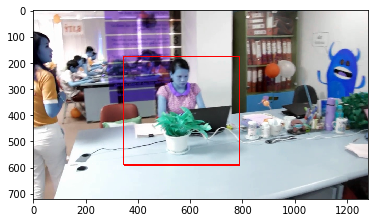

In [94]:
plt.imshow(img)

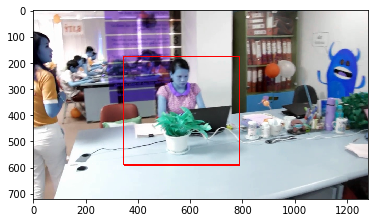

In [95]:
plt.imshow(img)